# 필수과제2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정(필수)
- 모든 변수를 다 사용해도 되고, 피처에대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행 (피처에 대한 중요도는 자율)
- 오늘 배운 군집화를 진행하는 과정에서의 근거 코드로 작성 (필수)

- 필수적으로 공유해야 하는 것 (필수)
  1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 (주석 필수)
  2. 해당 군집에 대한 특성 비교 
  3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지? 
- (단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안)

# 한글 폰트 깨짐 해결 

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 모델 import

In [1]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

%matplotlib inline 
# 브라우저에서 바로 그려지도록 
%config InlineBackend.figure_format = 'retina' # 그래프에 retina display 적용
plt.rc('font', family='NanumBarunGothic') # Colab 의 한글 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서  음수 부호설정

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import numpy as np

# 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/데이터 분석 중급반(6기)/데이터

Mounted at /content/drive
/content/drive/MyDrive/데이터 분석 중급반(6기)/데이터


In [4]:
data = pd.read_csv("./NH거래고객데이터.csv")
data.head()

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16


- Unnamed : 0의 경우 엑셀파일을 불러오는 과정에서 생기는 일련변호 형태의 열이므로 필요없는 열로 간주하고 삭제
- 계좌 : 마찬가지로 유니크한 고객의 계좌데이터일 것이므로 확인 후 제거여부 결정
  - 데이터의 개수와 유니크한 계좌데이터의 개수가 일치하므로 계좌 열 데이터도 삭제

In [5]:
print(data.shape)
print(data['계좌'].unique)

(10000, 11)
<bound method Series.unique of 0       64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...
1       5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...
2       1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...
3       6d497facfa1ea5901b827335553331f8555fec02a8184f...
4       b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...
                              ...                        
9995    2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...
9996    720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...
9997    7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...
9998    4006ddaa5673365096b9dd5965e20db866f6523c162f79...
9999    564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...
Name: 계좌, Length: 10000, dtype: object>


In [6]:
NH = data.drop(["Unnamed: 0", "계좌"], axis = 1)
NH.head()

,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,1,4,99,1,2,3,3,6,16
1,1,6,4,4,2,5,2,6,1
2,2,7,4,3,2,5,5,6,9
3,2,6,4,4,8,5,3,6,16
4,1,5,2,2,2,5,5,5,16


# 시각화

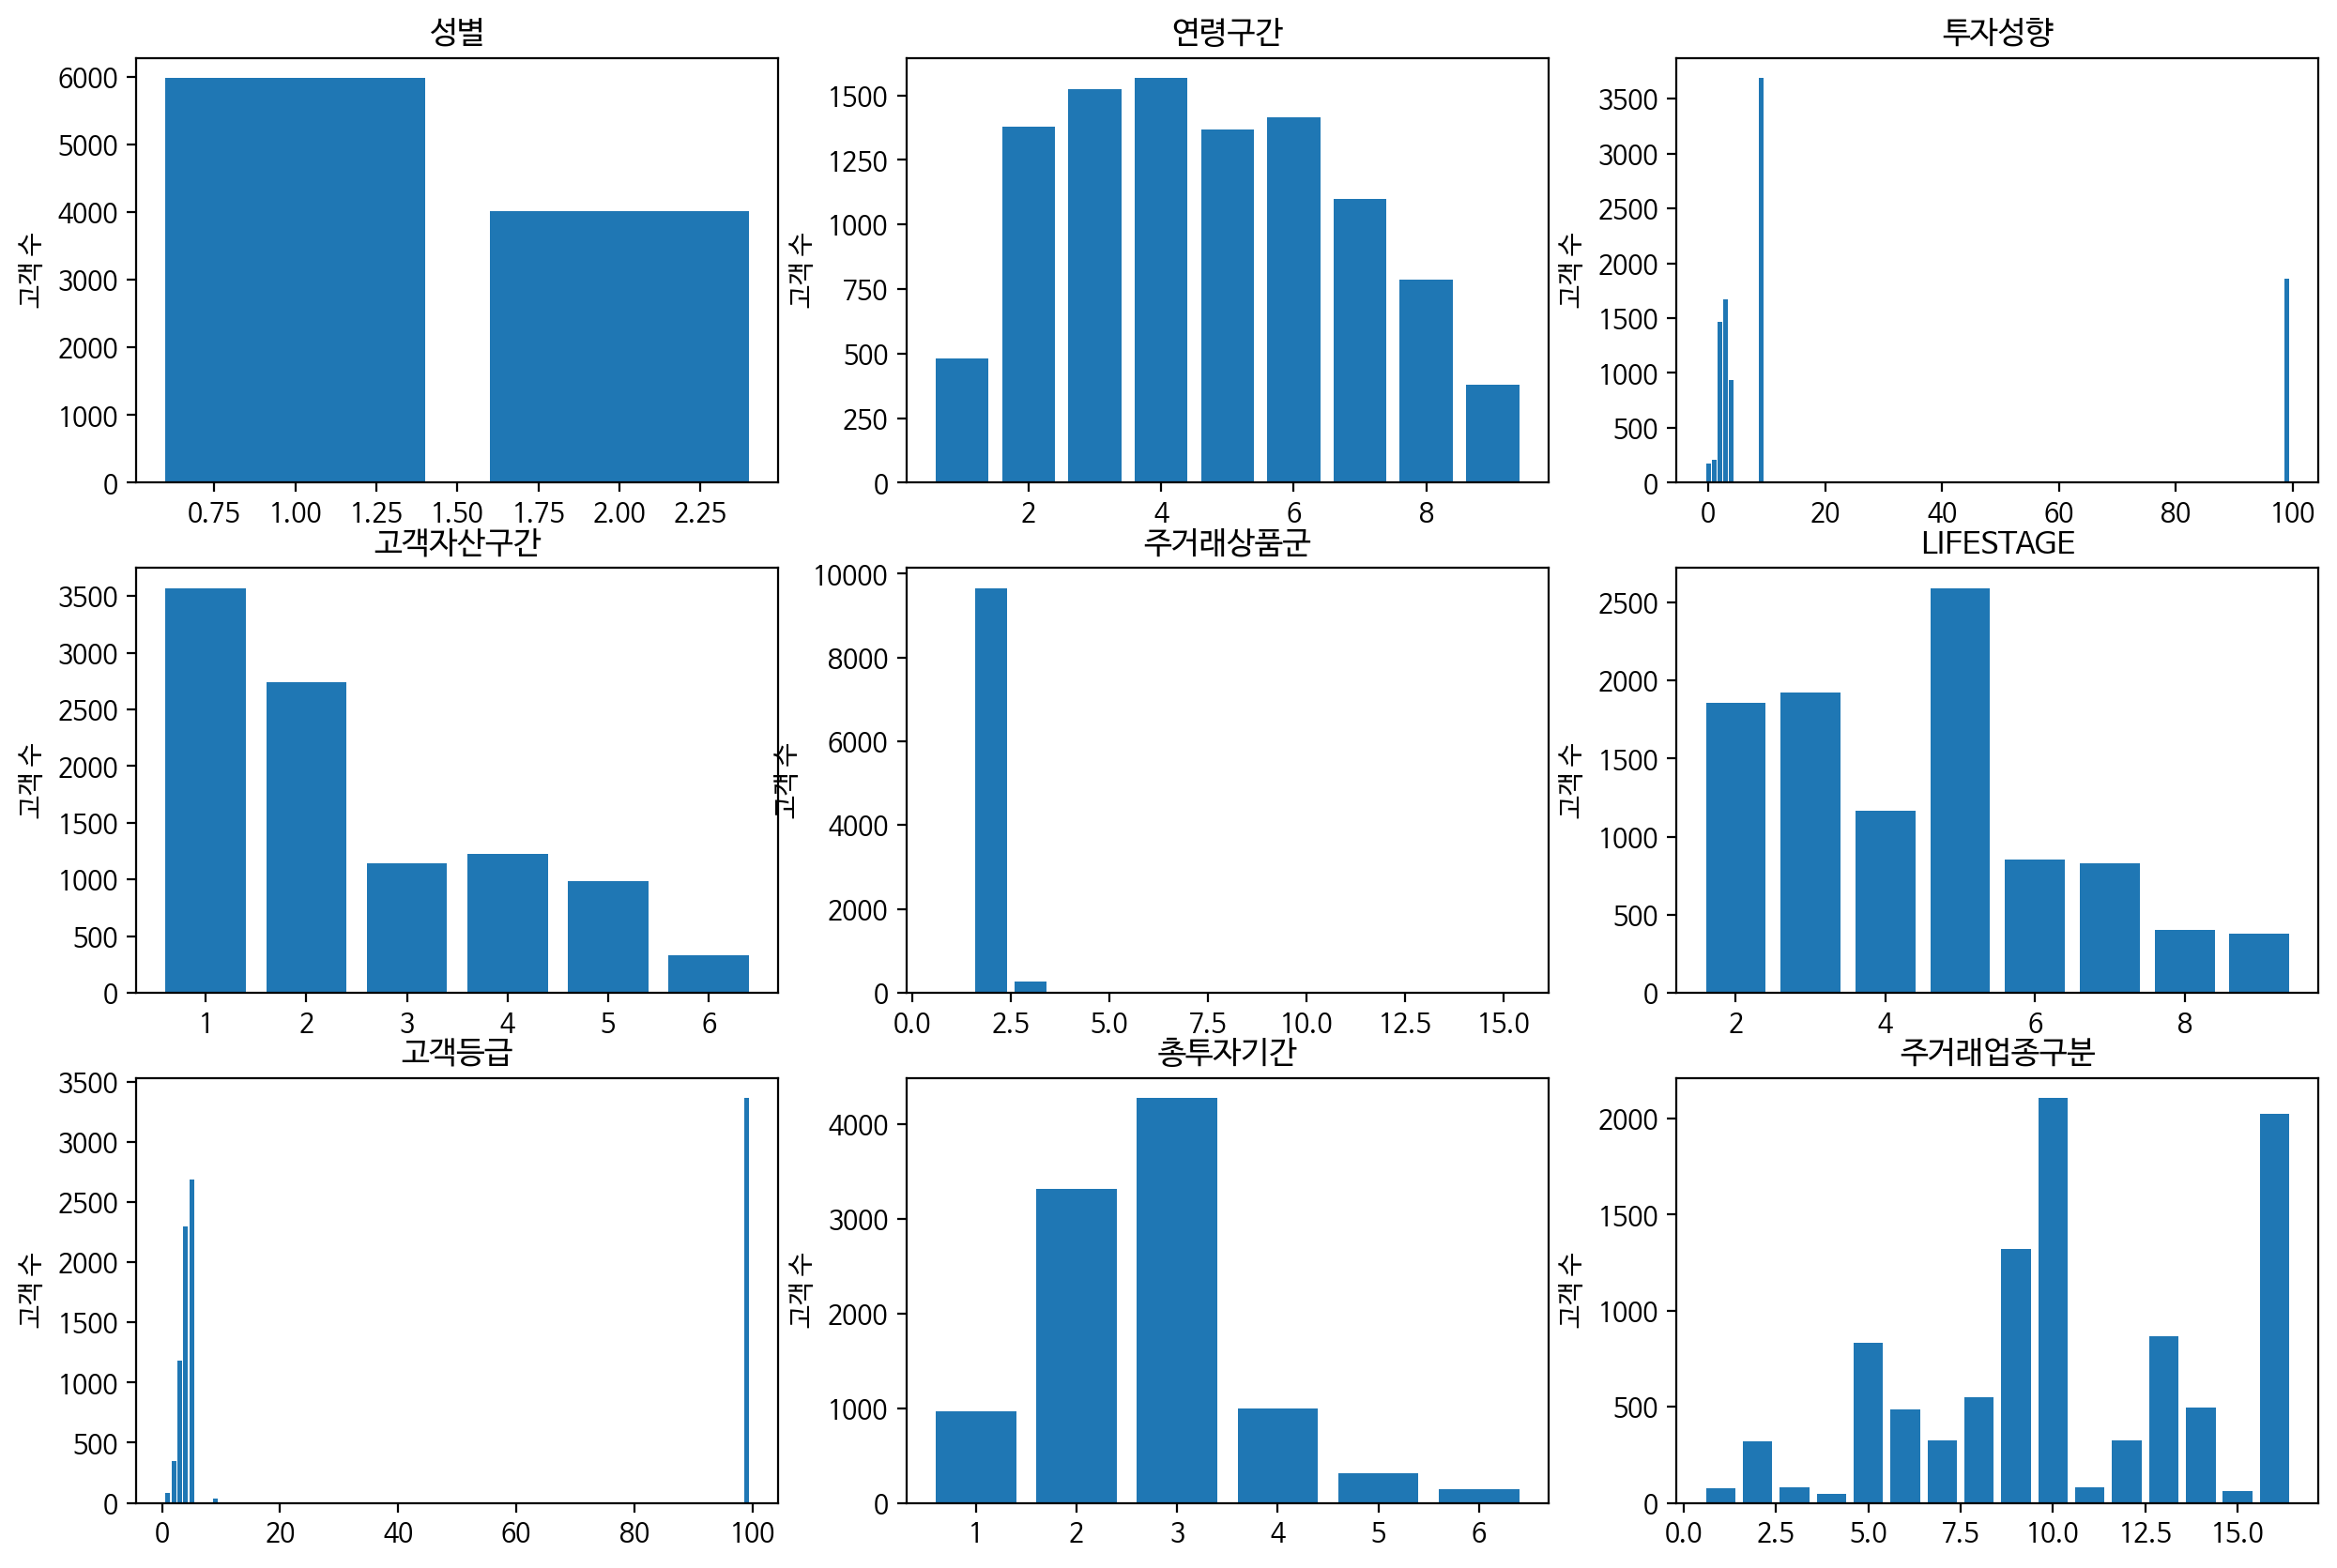

In [7]:
# 고객 등급별 고객의 수 시각화
i = 1
plt.figure(figsize = (15,10))
for col in NH.columns:
  if i<=9:
    plt.subplot(3,3,i)
    index = list(set(NH[col]))
    plt.bar(index, NH.groupby(col)['성별'].count())
    plt.title(col)
    plt.ylabel("고객 수")
    i+=1

plt.show()

- 투자성향과 고객등급에서 이상치 발견되었음. 추후 확인이 필요해보임
- 주거래상품군의 특정 데이터가 뚜렷하게 많이 보임. 추가적인 확인 필요

## 투자성향


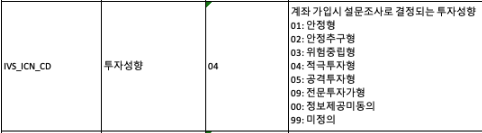

In [8]:
print("***********투자성향***********")
print(NH['투자성향'].value_counts())

***********투자성향***********
99    3687
4     1858
3     1669
2     1467
5      935
1      210
0      171
9        3
Name: 투자성향, dtype: int64


- 투자성향이 미정의(99)인 데이터가 많아 이상치로 판단, 투자성향 99인 데이터 제거

In [9]:
NH.drop(NH[NH['투자성향'] == 99].index, inplace = True)
print(NH['투자성향'].value_counts())

4    1858
3    1669
2    1467
5     935
1     210
0     171
9       3
Name: 투자성향, dtype: int64


## 고객등급


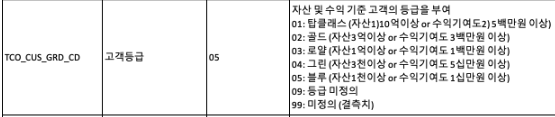

In [10]:
print("***********고객등급***********")
print(NH['고객등급'].value_counts())

***********고객등급***********
9     1805
5     1704
4     1536
3      900
2      284
1       70
99      14
Name: 고객등급, dtype: int64


- 마찬가지로 고객등급이 미정의(99)인 데이터를 이상치로 판단, 고객등급이 99인 데이터 제거
- 등급이 정의되지 않은 데이터(09)의 데이터 또한 이상치로 판단하여 제거

In [11]:
NH.drop(NH[NH['고객등급'] == 99].index, inplace = True)
NH.drop(NH[NH['고객등급'] == 9].index, inplace = True)
print(NH['고객등급'].value_counts())

5    1704
4    1536
3     900
2     284
1      70
Name: 고객등급, dtype: int64


## 주거래상품군

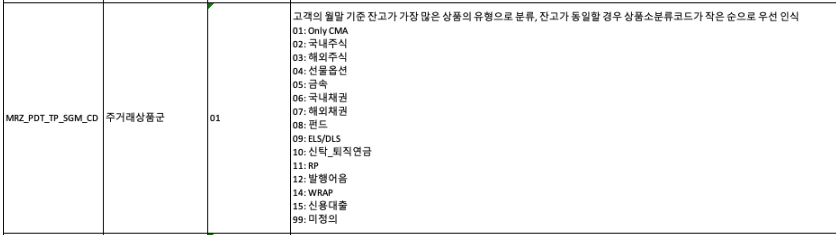

In [12]:
print("***********주거래상품군***********")
print(NH['주거래상품군'].value_counts())

***********주거래상품군***********
2     4226
3      218
1       15
8        7
10       7
15       6
5        5
9        4
11       3
6        2
12       1
Name: 주거래상품군, dtype: int64


- 주거래상품군이 미정의(99)인 데이터가 존재하지 않아 딱히 제거할 필요 없어보임

## 재시각화

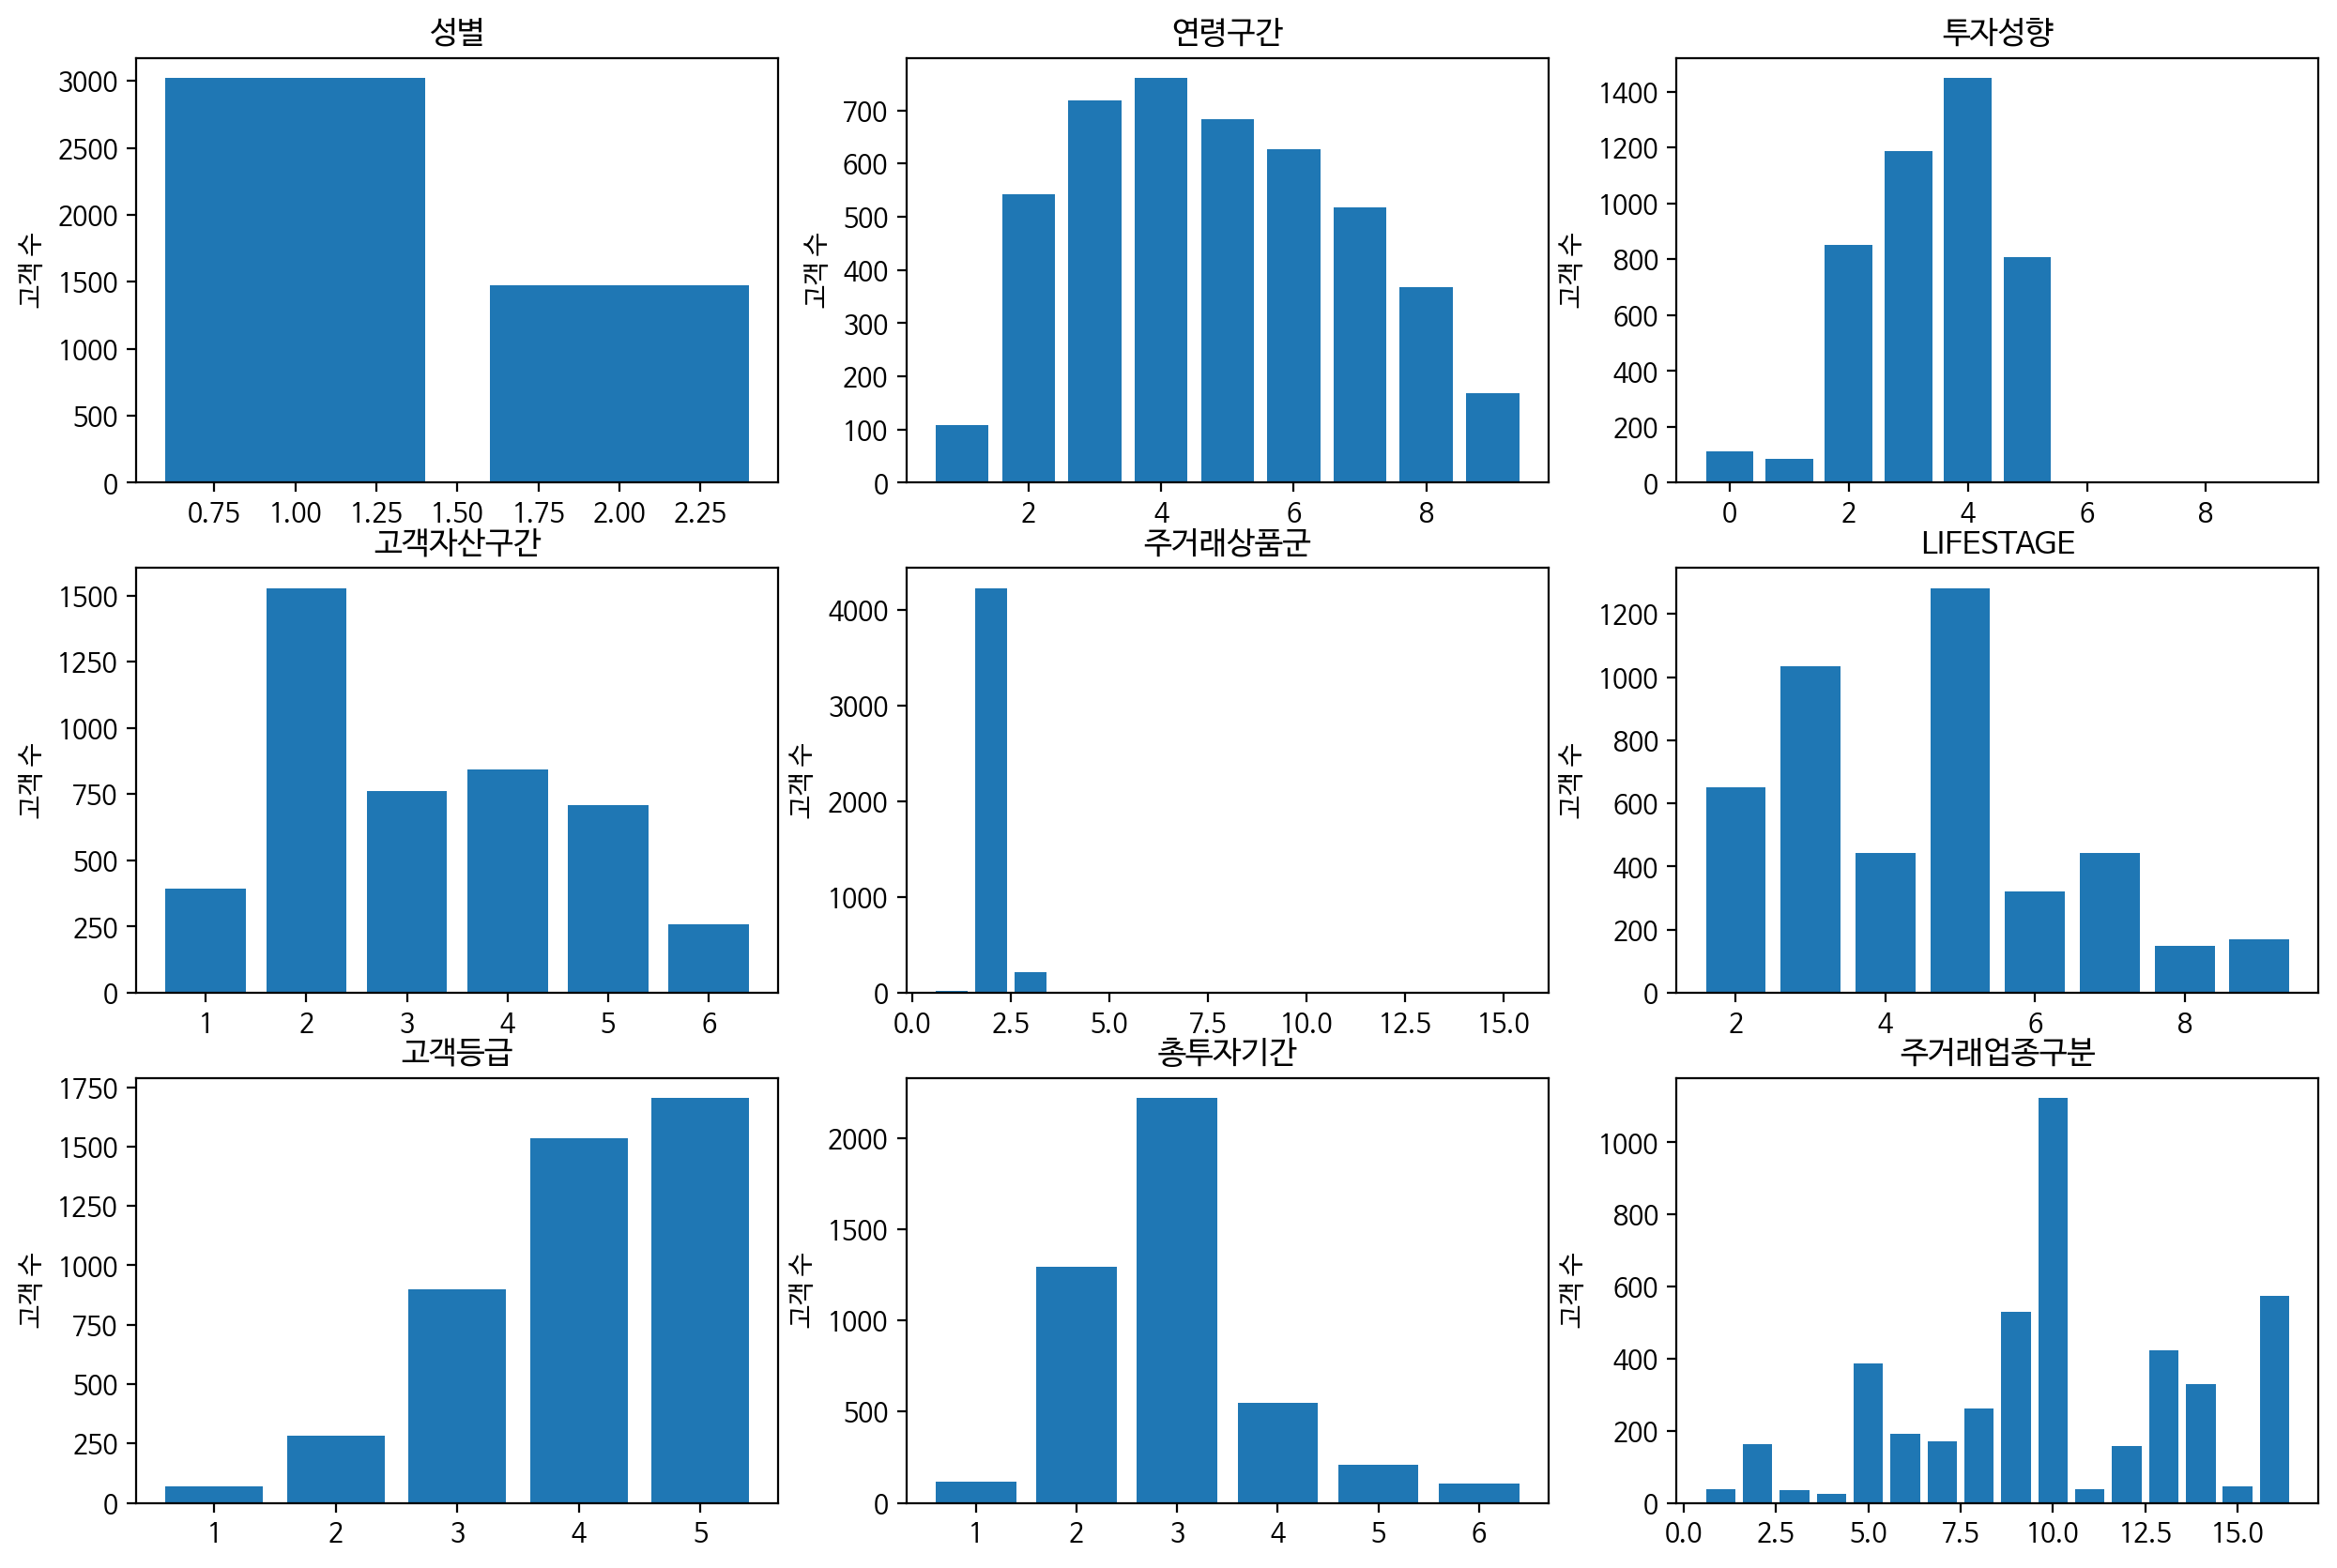

In [13]:
# 고객 등급별 고객의 수 시각화
i = 1
plt.figure(figsize = (15,10))
for col in NH.columns:
  if i<=9:
    plt.subplot(3,3,i)
    index = list(set(NH[col]))
    plt.bar(index, NH.groupby(col)['성별'].count())
    plt.title(col)
    plt.ylabel("고객 수")
    i+=1

plt.show()

## 상관관계 분석

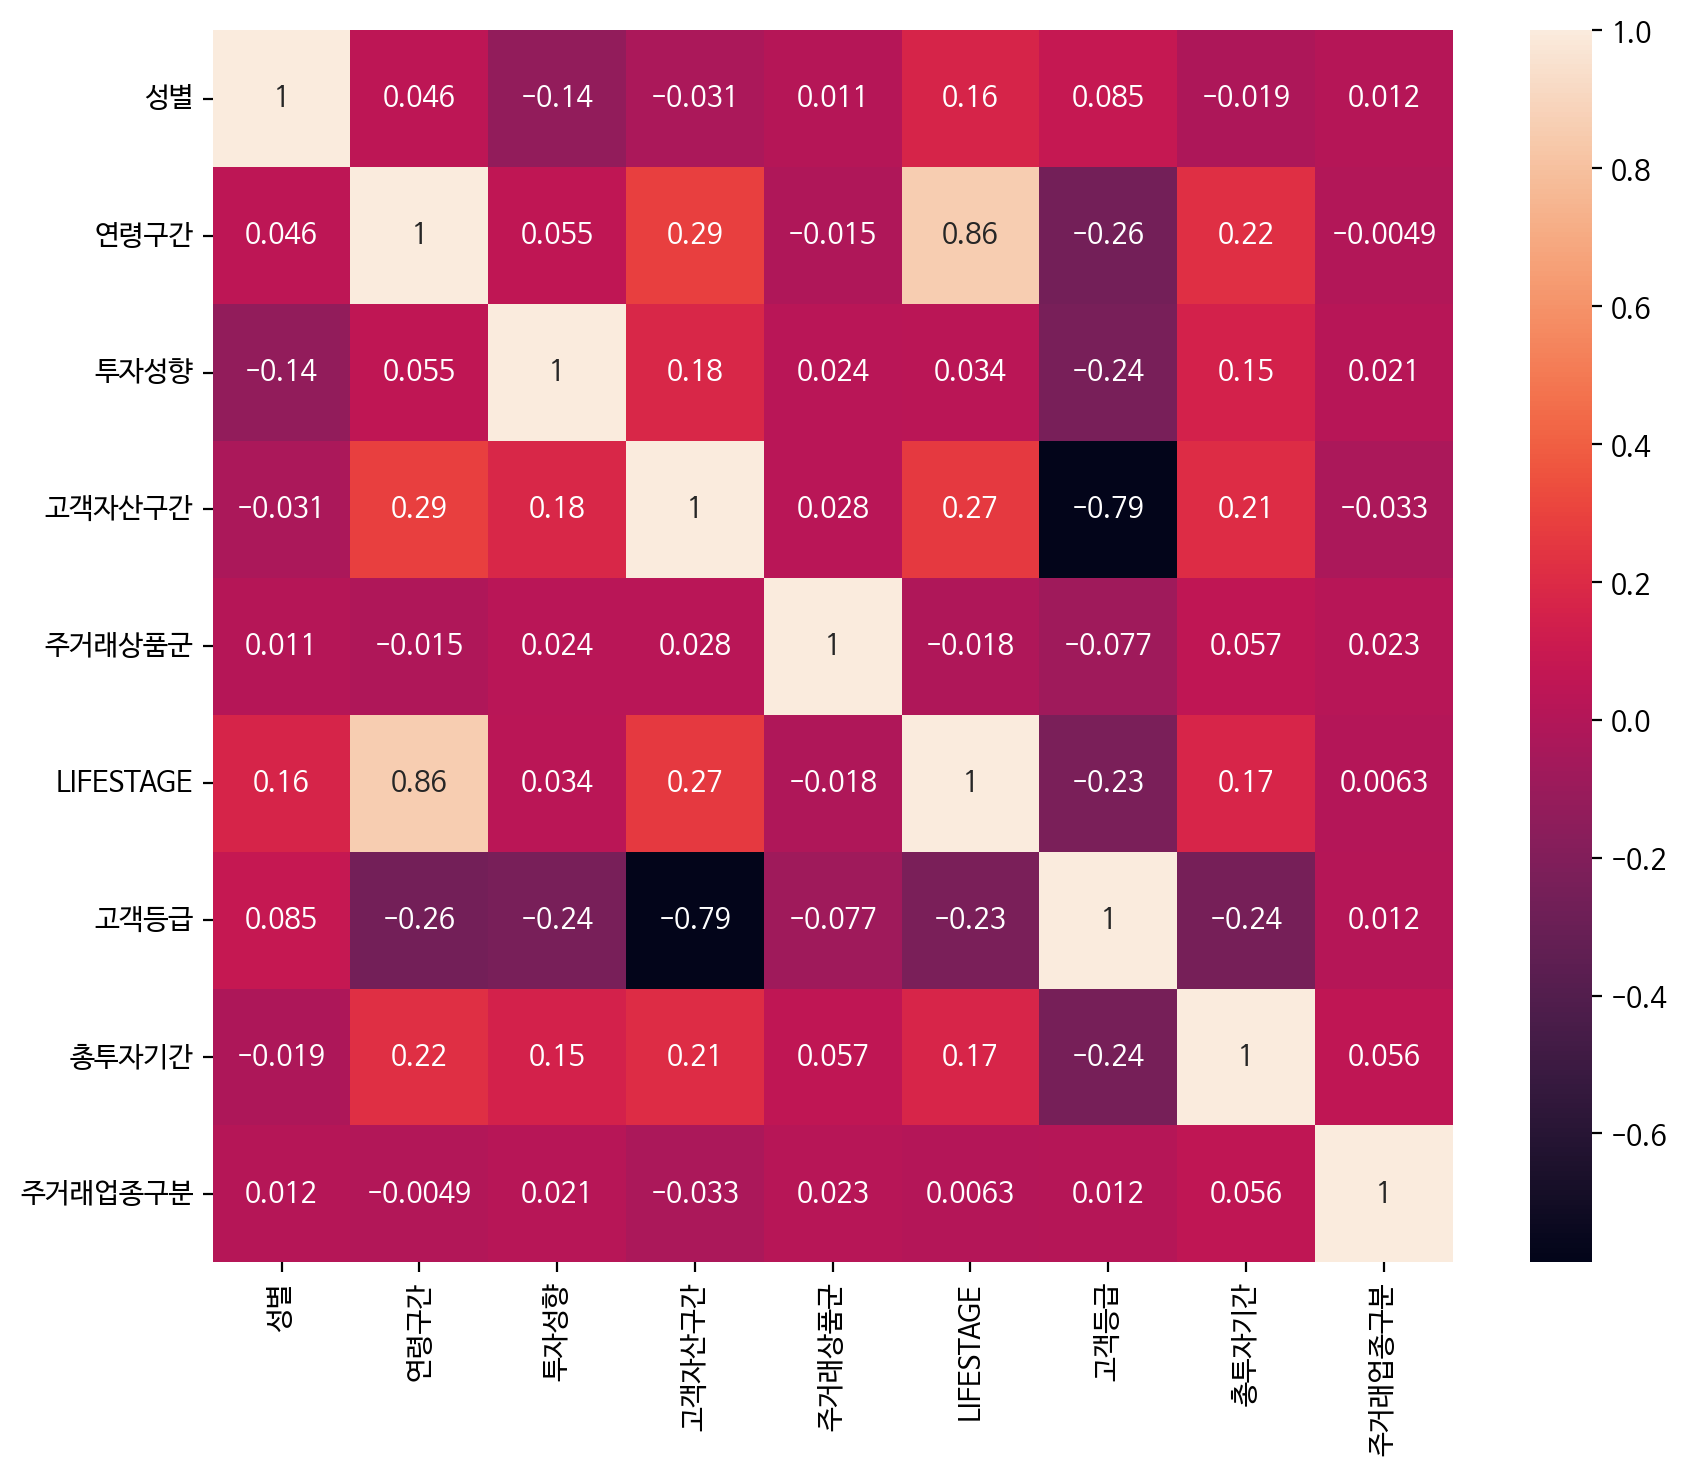

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(NH.corr(), annot=True);

- 고객등급과 고객자산구간이 큰 음의 상관관계를 보이고 있음(-0.79)

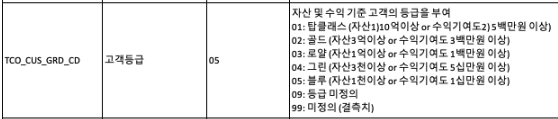

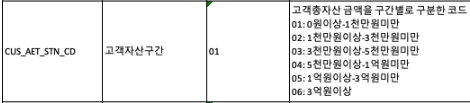

- LIFESTAGE와 연령구간이 큰 양의 상관관계를 보이고 있음(0.86)

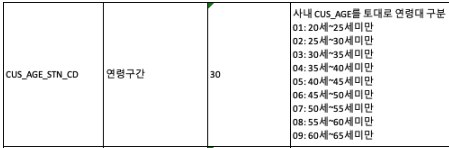

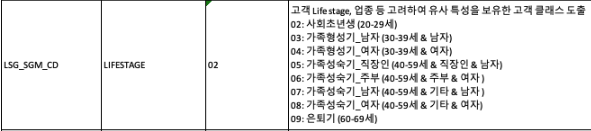

# 데이터 전처리

In [15]:
scaler = StandardScaler()
scaler.fit(NH)
scaled_ct = scaler.transform(NH)
scaled_ct

array([[-0.69792166,  0.57799519,  0.51970341, ..., -2.03407881,
         3.19297496, -2.4099243 ],
       [ 1.43282558,  1.06689231,  0.51970341, ...,  1.00823875,
         3.19297496, -0.28380228],
       [ 1.43282558,  0.57799519,  0.51970341, ..., -1.01997296,
         3.19297496,  1.57655449],
       ...,
       [-0.69792166,  2.04468655,  0.51970341, ...,  1.00823875,
        -0.99138881,  1.57655449],
       [ 1.43282558,  1.06689231,  0.51970341, ...,  1.00823875,
        -0.99138881,  1.57655449],
       [-0.69792166,  0.57799519, -2.84806462, ..., -1.01997296,
         2.14688402, -2.14415905]])

# 최적의 K 선별

## Elbow method
- 최적인 클러스터 개수(K)를 추정
- 뾰족하게 구부러진 부분이나 특정 지점이 팔처럼 굽어지는 부분을 K로 지정 
- k값의 증가 → 센트로이드의 증가 → 데이터들이 센트로이드에 더 가까워짐 → 왜곡값(SSE)의 감소


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

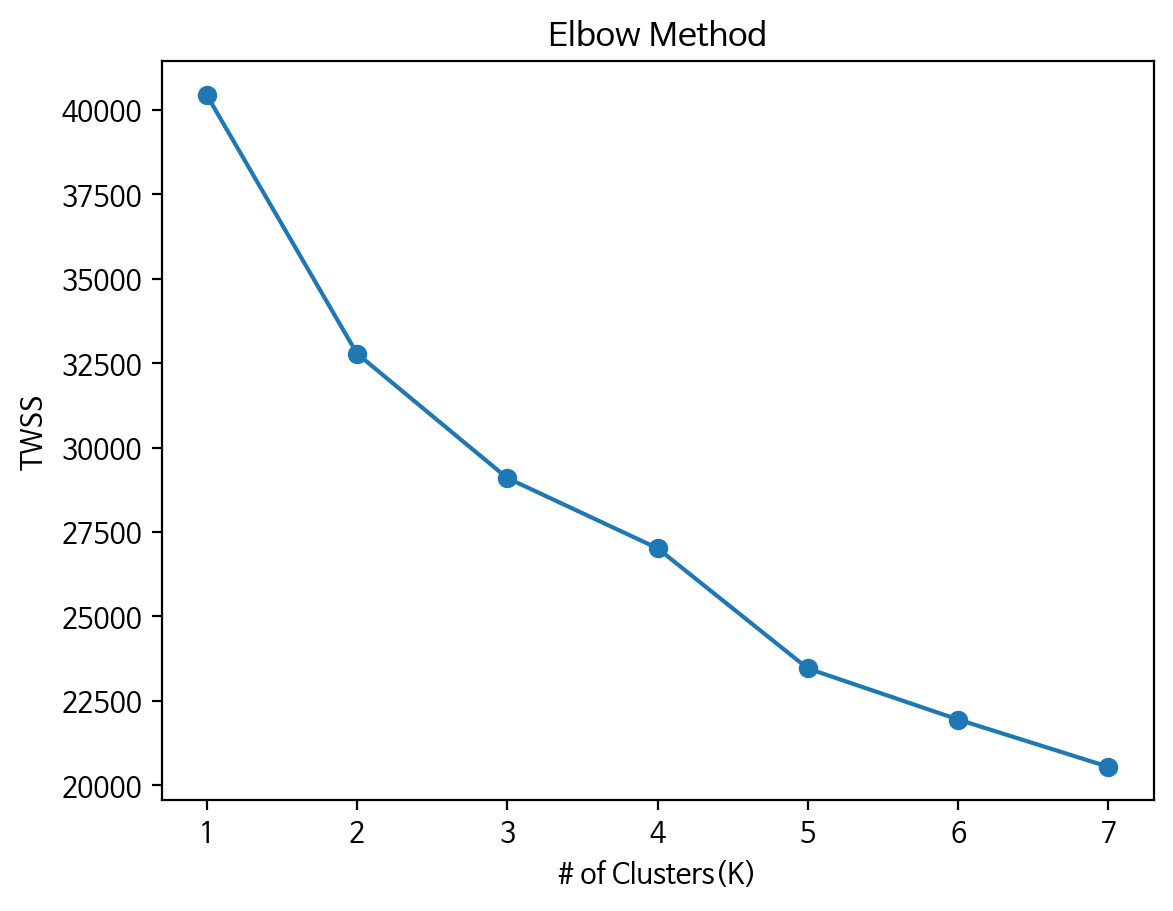

In [16]:
TWSS = {}
for k in range(1,8):
  model = KMeans(n_clusters = k, max_iter = 300, random_state = 111)
  model.fit(scaled_ct)
  TWSS[k] = model.inertia_

plt.plot(list(TWSS.keys()), list(TWSS.values()), marker = 'o')
plt.title("Elbow Method")
plt.xlabel("# of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

## 실루엣 기법 (Silhouette method)
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지를 나타냄

- 효율적으로 잘 분리 됐다 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다​
 
- 실루엣 계수 값은 0 ~ 1의 값을 가진다. 
  - 1에 가까울 수록 클러스터의 갯수에 따른 데이터는 군집과 멀리 떨어져 있다는 뜻이고, 0에 가까울수록 근처의 군집과 가깝다는 뜻이다.
  - 실루엣 계수는 1에 가까울수록 최적화가 잘 되어있다라고 판단할 수 있다

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

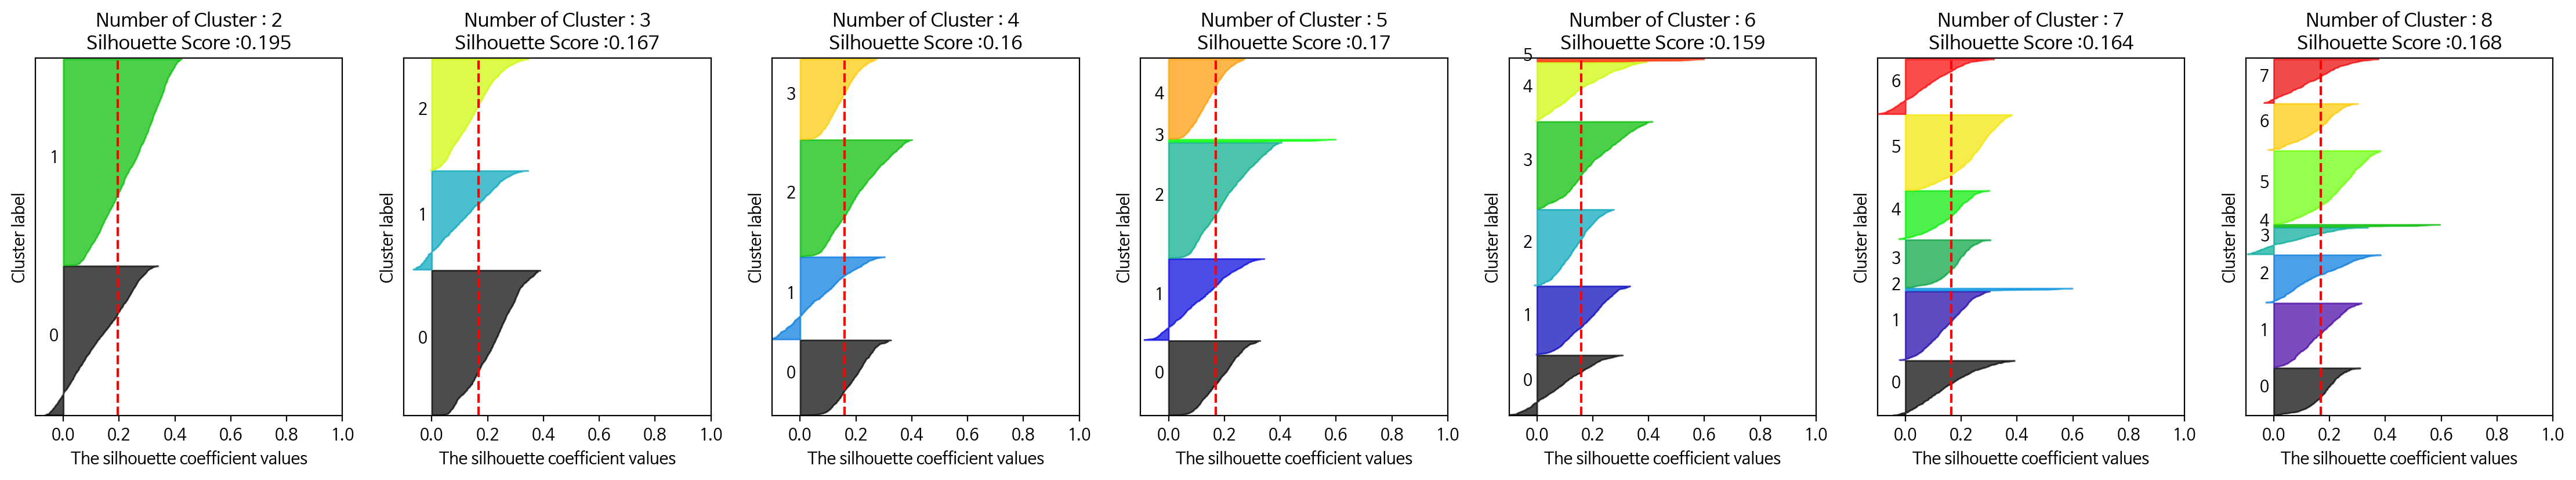

In [17]:
# 실루엣 기법
def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter = 300, random_state = 111)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6, 7, 8], scaled_ct)

- elbow method, silhouette의 결과, K = 3으로 선택하는 것이 좋아보임 

# K=3으로 군집화한 결과

In [18]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=111)
kmeans.fit(scaled_ct)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=111)

In [19]:
NH['cluster'] = kmeans.labels_
NH.head()

,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분,cluster
1,1,6,4,4,2,5,2,6,1,1
2,2,7,4,3,2,5,5,6,9,2
3,2,6,4,4,8,5,3,6,16,1
4,1,5,2,2,2,5,5,5,16,2
5,1,5,3,4,2,5,4,6,10,1


In [48]:
def x_prop(group):
    group['prop'] = group.count / group.count.sum()
    return group

# df = df.groupby('grp').apply(x_prop)

## 연령구간, LIFESTAGE

<Axes: xlabel='cluster', ylabel='성별'>

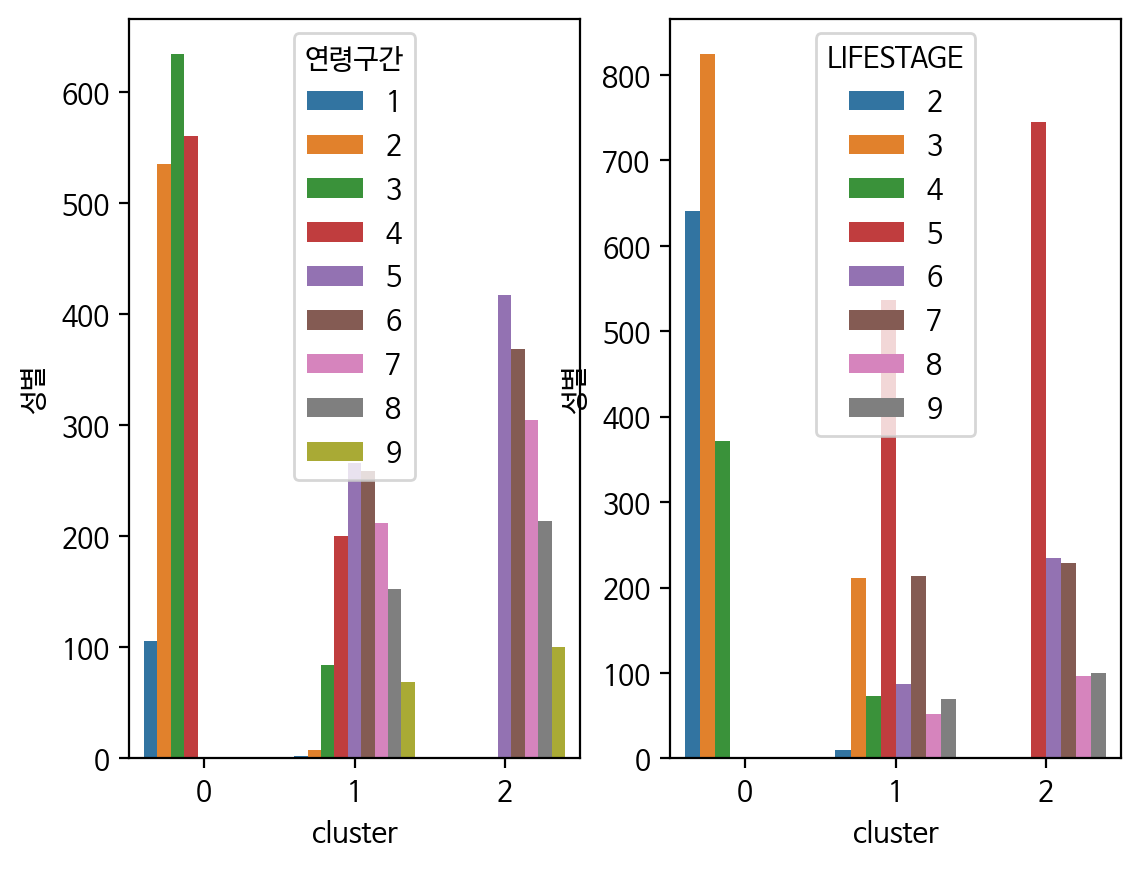

In [88]:
plt.subplot(1,2,1)
a1 = NH.groupby(["cluster",'연령구간'], as_index=False).count().reset_index()
sns.barplot(x='cluster', y='성별', hue='연령구간', data=a1)

plt.subplot(1,2,2)
a2 = NH.groupby(["cluster",'LIFESTAGE'])['성별'].count().reset_index()
sns.barplot(x='cluster', y='성별', hue='LIFESTAGE', data=a2)

- 각 군집의 연령구간, LIFESTAGE 확인 결과
  - 군집 0에서는 1~4구간으로, 40세 미만의 사람들이 많이 분포해 있음.
  - 군집 1에서는 2~9구간으로, 골고루 분포되어 있으나 4,5,6,7구간이 가장 많이 분포해 있음
  - 군집 2에서는 5~9구간으로, 40세 이상의 사람들이 주로 분포해 있음
  - LIFESTAGE도 연령구간과 비슷한 분포를 보임

## 고객자산구간, 고객등급

<Axes: xlabel='cluster', ylabel='성별'>

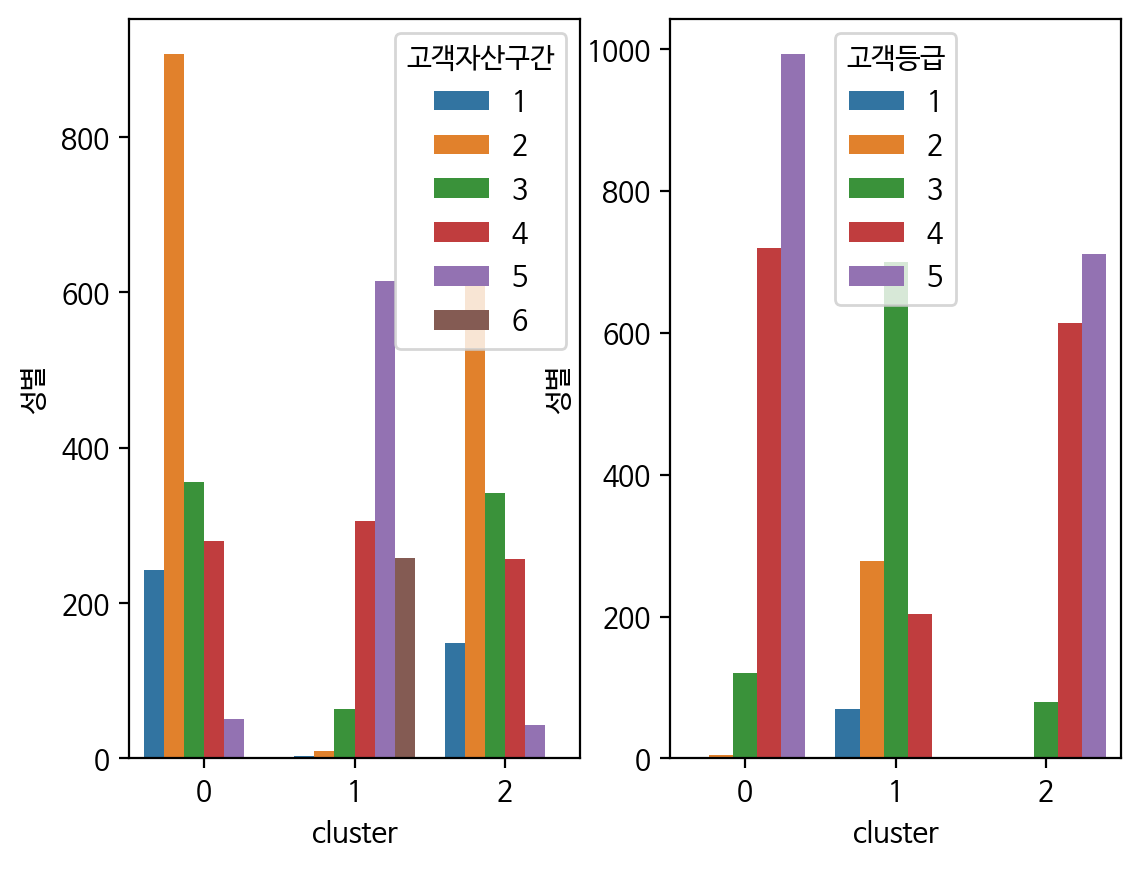

In [90]:
plt.subplot(1,2,1)
b1 = NH.groupby(['cluster', "고객자산구간"])['성별'].count().reset_index()
sns.barplot(x='cluster', y='성별', hue='고객자산구간', data=b1)

plt.subplot(1,2,2)
b2 = NH.groupby(['cluster', "고객등급"])['성별'].count().reset_index()
sns.barplot(x='cluster', y='성별', hue='고객등급', data=b2)

- 각 군집을 고객자산구간별로 나눠본 결과
  - 군집 0에서는 고객자산구간이 1-5로 분포되어 있고 고객자산이 2구간(1천만원~3천만원 미만)인 사람들이 가장 많이 분포
  - 군집 1에서는 고객자산구간이 2-6로 분포되어 있고 구간이 5구간(1억원이상~3억원미만)인 사람들이 많이 분포
  - 군집 2에서는 1-5로 분포되어 있고 군집 0과 마찬가지로 고객자산이 2구간(1천만원~3천만원 미만)인 사람들이 가장 많이 분포

- 각 군집을 고객등급별로 나눠본 결과
  - 군집 0 :  고객등급이 3-5로 분포, 고객등급이 5(블루(자산1천이상/수익기여도 1십만원이상))인 사람들이 가장 많이 분포
  - 군집 1 :  고객등급이 1-4로 분포, 고객등급이 3(로얄(자산 1억원 이상/수익기여도 1백만원이상))인 사람들이 많이 분포
  - 군집 2 : 고객등급이 3-5로 분포, 군집 0과 마찬가지로 고객등급이 5(블루(자산1천이상/수익기여도 1십만원이상))인 사람들이 가장 많이 분포

## 투자성향

<Axes: xlabel='cluster', ylabel='성별'>

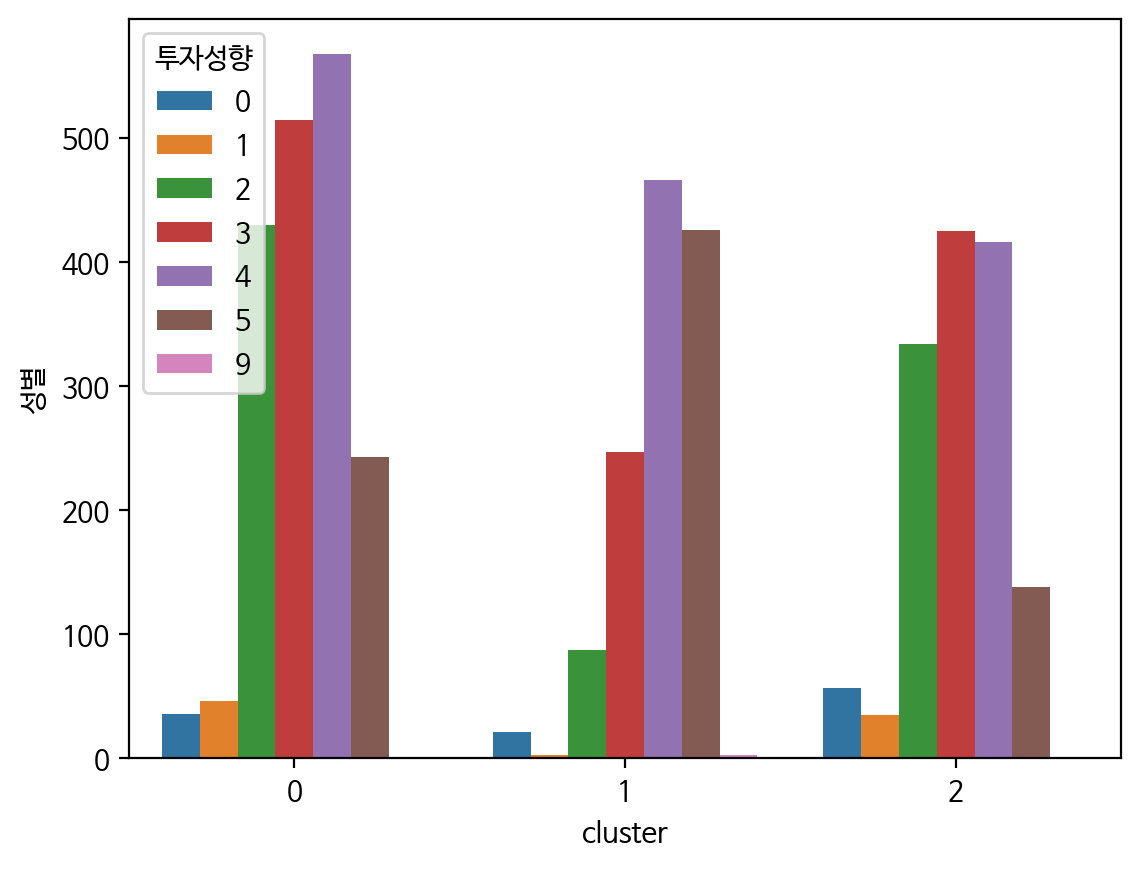

In [86]:
d = NH.groupby(['cluster', '투자성향'])['성별'].count().reset_index()
sns.barplot(x='cluster', y='성별', hue='투자성향', data=d)

- 각 군집을 투자성향별로 나눠본 결과
  - 군집 0에서는 투자성향이 4,3,2,5 순으로 가장 많았다. 군집 0에는 적극적이고 공격적으로 투자하는 사람들이 많이 모여있다.
  - 군집 1에서는 투자성향이 4,5,3,2 순으로 가장 많이 분포되어 있다. 군집 1에도 마찬가지로 공격적이고 적극적으로 투자하는 사람들이 많이 모여있다.
  - 군집 2에서는 3,4,2,5 순으로 가장 많이 분포되어 있다. 군집 0과 비슷한 형태를 보인다.

- 모든 군집에서 투자성향이 매우 강하게 나타나나, 군집0과 2에서 투자성향이 2(안정추구형)인 사람들이 많이 나타난다. 

## 총투자기간

<Axes: xlabel='cluster', ylabel='성별'>

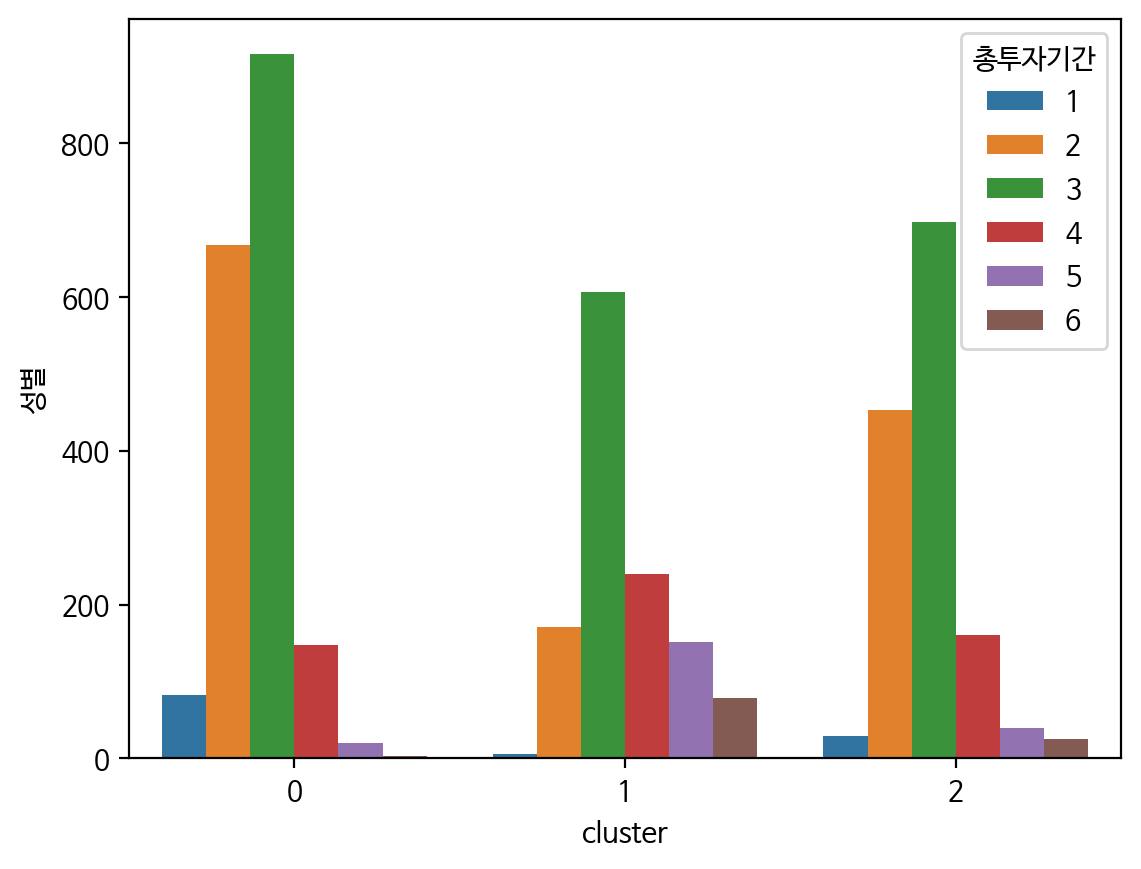

In [87]:
e = NH.groupby(['cluster', '총투자기간'])['성별'].count().reset_index()
sns.barplot(x='cluster', y='성별', hue='총투자기간', data=e)

- 각 군집을 총투자기간별로 나눠본 결과
  - 모든 군집에서 3,2,4가 가장 많이 보임(6개월~5년)
  - 군집 0과 2에서는 군집 1에 비해 총투자기간구간이 2인 사람들이 많음(6개월~1년)
  - 군집 1에서는 군집 0,2에 비해 총투자기간구간이 4~6인 사람들이 많음(3년이상)
  - 군집 0,2의 사람들은 투자기간이 짧고, 군집 1은 총투자기간이 긺

# 최종 결과 및 전략

## 각 군집별 특징 요약표
|군집|0|1|2|
|:---:|:---:|:---:|:---:|
|연령구간, LIFESTAGE|40세 미만(1-4)|골고루 분포(2-9)|40세 이상(5-9)
|고객자산구간|1-5|2-6|1-5|
|고객등급|3-5|1-4|3-5|
|투자성향||전체적으로 공격적인 성향, 군집 0,2에서 안정형 추구 성향 높음 ||
|총투자기간||전체적으로 6개월~5년 가장 많음, 군집 0,2는 6개월-1년이 많고, 군집 1은 3년이상 장기투자자 많음||


- 군집 0은 젊은 사람들로, 고객 자산이 적어 등급도 낮은 편이고, 투자성향이 공격적인 성향의 사람들이 많지만 안정적인 투자성향을 고집하는 사람들도 많다
- 군집 1은 장년층의 사람들로, 고객자산이 많아 등급도 높고, 적즉적인 투자성향을 가진 사람들이 매우 많은 것을 볼 수 있다
- 군집 2는 군집 0의 사람들과 비슷한 특징을 보인다

## 최종 도출가능 마케팅 전략
- 젊은 사람들이나 노년층의 경우 자산이 적어 투자기간이 짧고 안정적인 투자를 하려는 사람들이 많다는 것을 확인할 수 있다. 이러한 연령대를 위해 단기적이고 안정적으로 투자 가능한 투자 상품을 판매하는 것이 좋아 보인다
- 청장년층의 경우 자산도 어느정도 많이 있고 투자기간도 길어 공격적이고 적극적인 투자자들이 많다. 이러한 사람들에게 장기적으로 공격적으로 많은 이익을 볼 수 있는 상품들을 판매하는 것이 좋아보인다.